In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from pathlib import Path
from path import Path


pd.options.display.max_rows = 100

In [2]:
# Load the data
file_path = Path('Resources/parks_pop_bio.csv')
df = pd.read_csv(file_path)
df.head()

,park_code,park_name,state,acres,latitude,longitude,trail_count,avg_popularity,species_count
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21,179,8.376,1709
1,ARCH,Arches National Park,UT,76519,38.68,-109.57,48,13.462,1048
2,BADL,Badlands National Park,SD,242756,43.75,-102.50,10,13.141,1389
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25,70,7.176,2269
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08,4,4.055,1726


In [3]:
# Create variables for linear regression

#confirm column name for X
X = df["species_count"]

y = df["avg_popularity"]


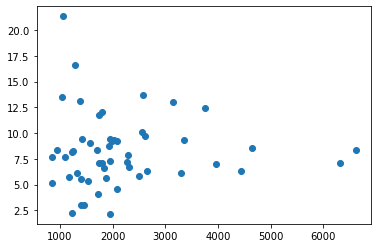

In [4]:
plt.scatter(X, y)

In [5]:
from sklearn.model_selection import train_test_split

#X = np.array([row[0] for row in X]).reshape(-1, 1)
X = df.species_count.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X[:5])
print(X.shape)

[[1709]
 [1048]
 [1389]
 [2269]
 [1726]]
(52, 1)


In [6]:

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test, y_test)

-0.0173393282515677

In [7]:
# Test code for linear regression plot. TBD IF THIS WILL WORK

# Note: We have to transform our min and max values
# so they are in the format of array([[0.4999]]).
# This is the required format for `model.predict()`.
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[848]]
Max X Value: [[6623]]


Weight coefficients:  [3.89766409e-05]
y-axis intercept:  7.987526211584382


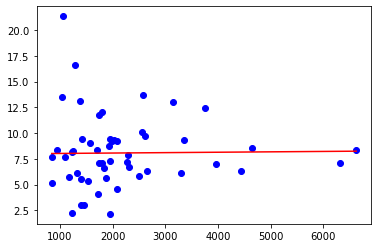

In [8]:
# Test code for linear regression plot. TBD IF THIS WILL WORK
# Calculate the y_min and y_max by using model.predict and x_min and x_max.

# Print the coefficient and the intercept for the model.

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

y_min = model.predict(x_min)
y_max = model.predict(x_max)

# Plot X and y by using plt.scatter.
# Plot the model fit line by using [x_min[0], x_max[0]], [y_min[0], y_max[0]].

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
